In [1]:
# Read simulator images from udacity training set
import csv
import numpy as np
import cv2

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

# Create training set
images = []
measurements = []

for line in lines:
    # csv format: center,left,right,steering,throttle,brake,speed
    source_path_center = line[0]
    source_path_left = line[1]
    source_path_right = line[2]

    center_path = 'data/' + source_path_center # Updated pathnames
    left_path = 'data/' + source_path_left
    right_path = 'data/' + source_path_right

    center_image = cv2.imread(center_path) # Read in images
    left_image = cv2.imread(left_path)
    right_image = cv2.imread(right_path)

    if center_image is not None: # Create dataset using images/steering angles from each camera
        images.append(center_image)
        measurements.append(float(line[3]) * 1.05)
    if left_image is not None:
        images.append(left_image)
        measurements.append(float(line[3]) * 0.2)
    if right_image is not None:
        images.append(right_image)
        measurements.append(float(line[3]) * -0.2)


# Add some more images by flipping
r = len(images)
for i in range(2000):
    idx=np.random.randint(r)
    images.append(np.fliplr(images[idx]))
    measurements.append(measurements[idx] * -1.3)
     
X_train = np.array(images)
y_train = np.array(measurements)


/home/carnd/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


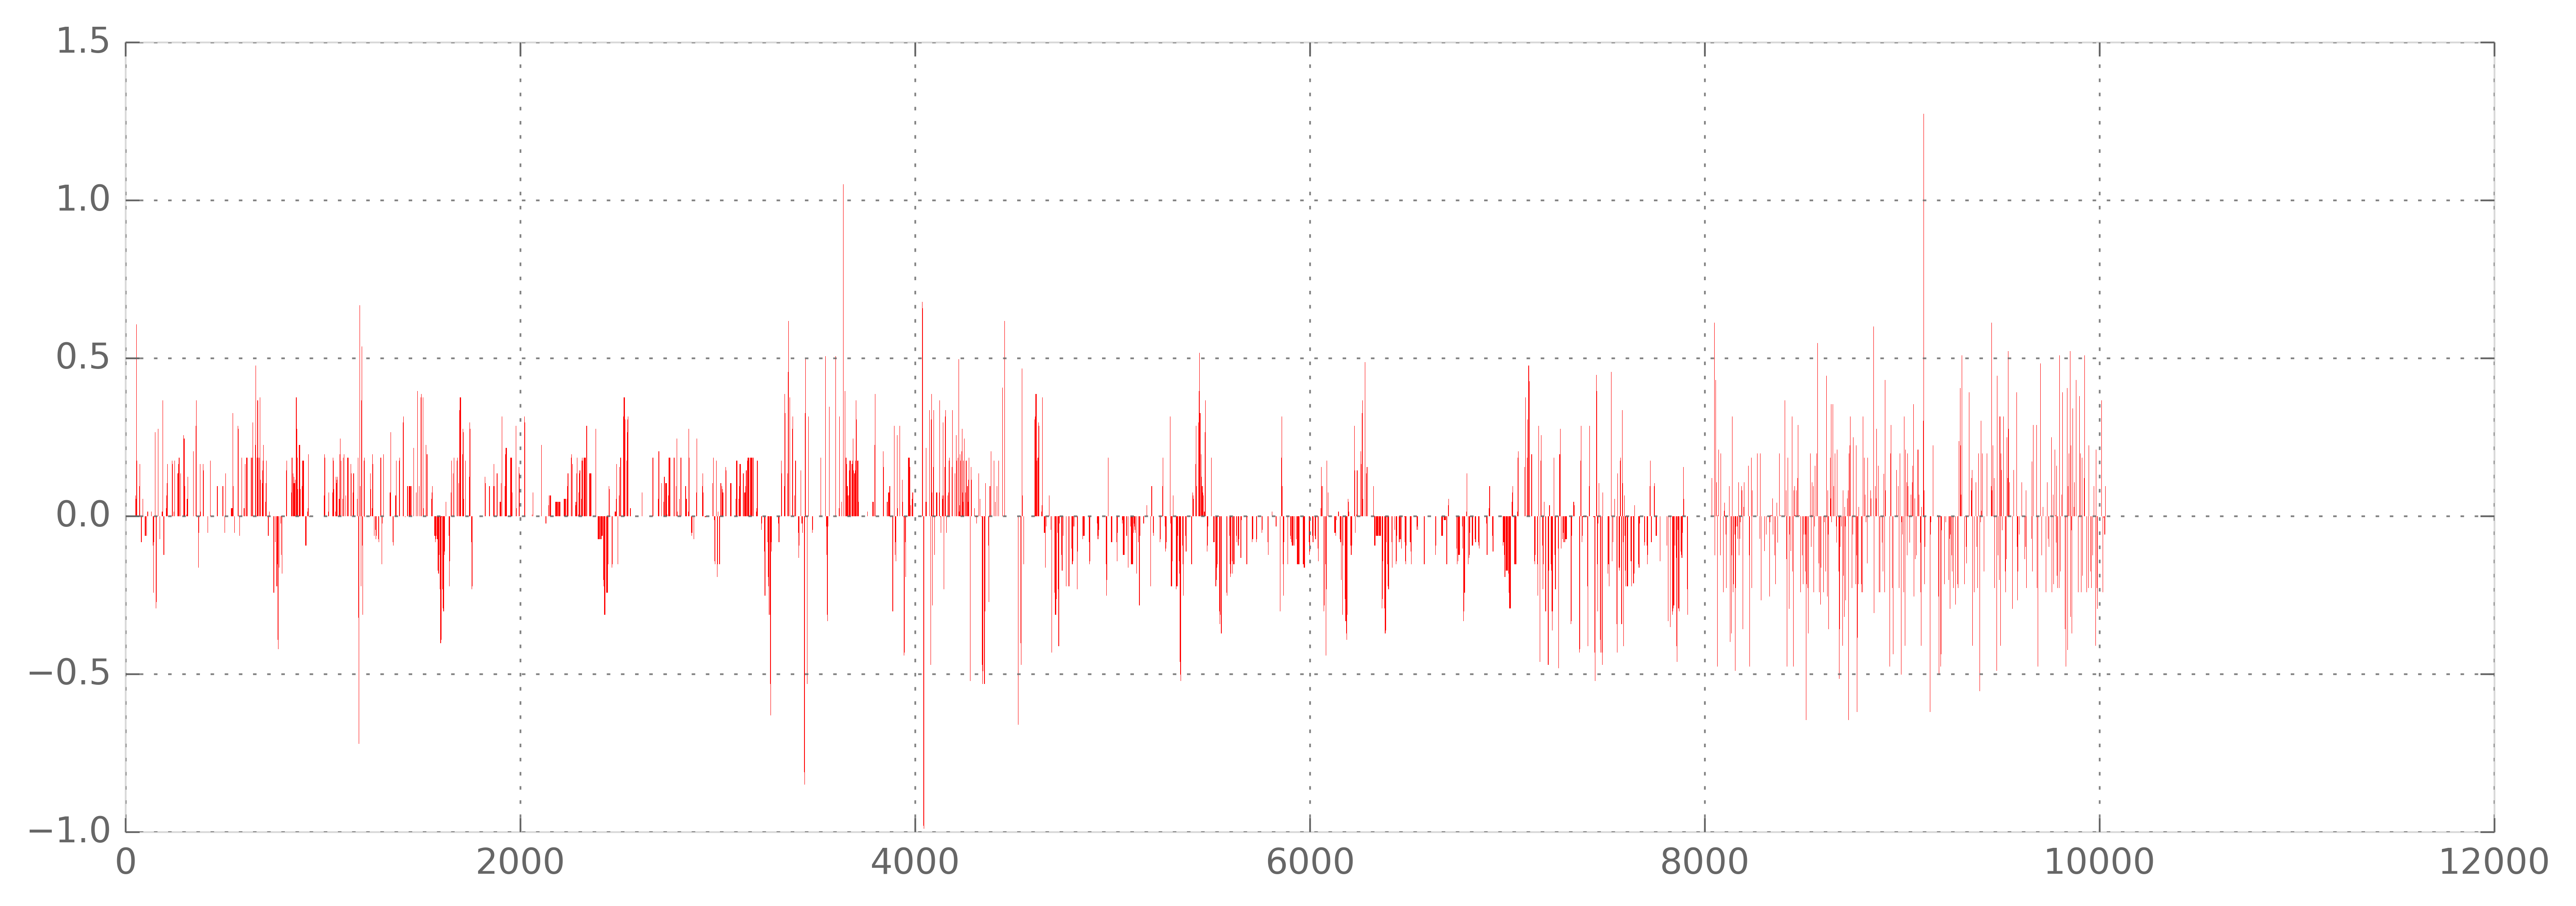

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Check training set angles 
plt.figure(figsize=(12, 4))
plt.bar(range(len(y_train)), y_train, color='r')
#plt.xlim(0,8000)
plt.show()

In [3]:
# Model based on https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/
# Using keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout, Dense, Lambda, Cropping2D, Activation, Flatten

model = Sequential()

# pre process as described in lecture
# 1. Normalize input data
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3))) 

# 2. Crop 70 pixels off the top and 20 pixels off the bottom of images
model.add(Cropping2D(cropping=((70,20),(0,0)))) 

Using TensorFlow backend.


In [4]:
model.add(Conv2D(filters=24, kernel_size=5, strides=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=1))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=36, kernel_size=5, strides=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=1))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=48, kernel_size=5, strides=(2, 2), activation='relu'))
#model.add(Dropout(0.35))
model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), activation='relu'))
#model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), activation='relu'))
#model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# train model
model.fit(X_train, y_train, validation_split=0.25, shuffle=True, epochs=10)
model.save('model.h5')

Train on 7527 samples, validate on 2509 samples
Epoch 1/10
7527/7527 [==============================] - 272s - loss: 0.0155 - acc: 0.5345 - val_loss: 0.0267 - val_acc: 0.5568
Epoch 2/10
7527/7527 [==============================] - 270s - loss: 0.0111 - acc: 0.5351 - val_loss: 0.0249 - val_acc: 0.5568
Epoch 3/10
7527/7527 [==============================] - 270s - loss: 0.0104 - acc: 0.5351 - val_loss: 0.0246 - val_acc: 0.5568
Epoch 4/10
7527/7527 [==============================] - 270s - loss: 0.0098 - acc: 0.5351 - val_loss: 0.0216 - val_acc: 0.5568
Epoch 5/10
7527/7527 [==============================] - 270s - loss: 0.0095 - acc: 0.5351 - val_loss: 0.0235 - val_acc: 0.5568
Epoch 6/10
7527/7527 [==============================] - 270s - loss: 0.0093 - acc: 0.5350 - val_loss: 0.0229 - val_acc: 0.5568
Epoch 7/10
7527/7527 [==============================] - 270s - loss: 0.0088 - acc: 0.5351 - val_loss: 0.0243 - val_acc: 0.5568
Epoch 8/10
7527/7527 [==============================] - 270s - 